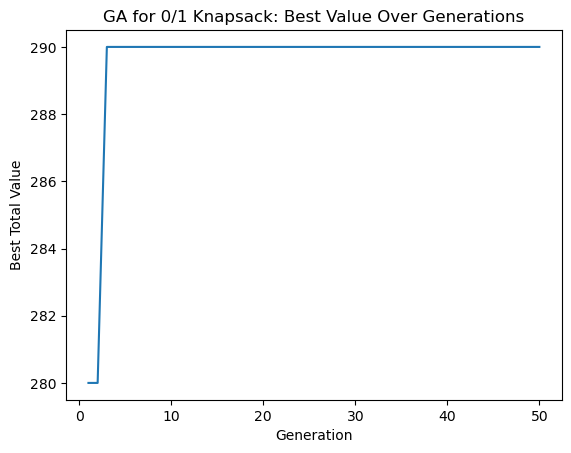

In [3]:
import random
import matplotlib.pyplot as plt

# Define a small knapsack instance
values = [60, 100, 120, 80, 30, 50, 70, 20, 10, 40]
weights = [10, 20, 30, 15, 5, 8, 12, 4, 2, 6]
capacity = 50
n_items = len(values)

# Helper functions
def random_chrom():
    return [random.randint(0, 1) for _ in range(n_items)]

def fitness(chrom):
    total_w = sum(w * g for w, g in zip(weights, chrom))
    total_v = sum(v * g for v, g in zip(values, chrom))
    return total_v if total_w <= capacity else 0

def tournament_selection(pop, k=3):
    return max(random.sample(pop, k), key=fitness)

def crossover(p1, p2, p_cross=0.8):
    if random.random() < p_cross:
        pt = random.randrange(1, n_items)
        return p1[:pt] + p2[pt:], p2[:pt] + p1[pt:]
    return p1[:], p2[:]

def mutate(chrom, p_mut=0.01):
    return [gene ^ 1 if random.random() < p_mut else gene for gene in chrom]

# GA parameters
pop_size = 50
generations = 50

# Initialize population
pop = [random_chrom() for _ in range(pop_size)]
best_values = []

# Run GA
for gen in range(generations):
    best_values.append(max(fitness(c) for c in pop))
    new_pop = []
    while len(new_pop) < pop_size:
        p1 = tournament_selection(pop)
        p2 = tournament_selection(pop)
        c1, c2 = crossover(p1, p2)
        new_pop.append(mutate(c1))
        if len(new_pop) < pop_size:
            new_pop.append(mutate(c2))
    pop = new_pop

# Plot best value over generations
plt.plot(range(1, generations + 1), best_values)
plt.xlabel('Generation')
plt.ylabel('Best Total Value')
plt.title('GA for 0/1 Knapsack: Best Value Over Generations')
plt.show()